In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qetpy as qp
from pprint import pprint
from qetpy import Noise
from qetpy.sim import TESnoise
from qetpy.plotting import compare_noise, plot_noise_sim

In [2]:
method_list = sorted([func for func in dir(qp.OptimumFilter) if callable(getattr(qp.OptimumFilter, func)) and not func.startswith("__")])
pprint(method_list)

['_check_freqs',
 '_interpolate_of',
 '_interpolate_parabola',
 'chi2_lowfreq',
 'chi2_nopulse',
 'energy_resolution',
 'ofamp_baseline',
 'ofamp_nodelay',
 'ofamp_pileup_iterative',
 'ofamp_pileup_stationary',
 'ofamp_withdelay',
 'time_resolution',
 'update_signal']


/home/s/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Optimum filter

In [3]:
OF = qp.OptimumFilter(signal, template, psd_sim, fs)

NameError: name 'signal' is not defined

### Signal

In [22]:
traces_PT_on = np.load('wavedumpdata/wavedump_Tl_processed.npy')


print (len(traces_PT_on))
traces_PT_on = traces_PT_on.reshape(1, 1, len(traces_PT_on))


signal = traces_PT_on[:,:,:15000]
signal = signal.reshape(15000,)

1000


ValueError: cannot reshape array of size 15000000 into shape (1,1,1000)

### PSD - Power Spectral Density

In [13]:

tl_noise = Noise(traces=traces_PT_on,
                   fs=fs, 
                   channames=channels,
                   name= 'Testing CsI_Tl') #initialize a noise object

channels = [ 'Channel' ] 

fs = 1/2e-9
f = np.fft.fftfreq(15000, d=1/fs)

noisesim = TESnoise(freqs = tl_noise.freqs[1:])
psd_sim = noisesim.s_iload(freqs=f) + noisesim.s_ites(freqs=f) + noisesim.s_itfn(freqs=f)



### Template

we need psd to get a template. So we have to do noise funciton to get psd 

In [14]:



tau_f = 1.5e-6 # [s] fall time
tau_r = 0.05e-6 # [s] rise time

t = np.arange(len(psd_sim))/fs

pulse = np.exp(-t/tau_f)-np.exp(-t/tau_r)
pulse_shifted = np.roll(pulse, len(t)//2)


template = pulse_shifted/pulse_shifted.max()


### Optimum filter

In [15]:
OF = qp.OptimumFilter(signal, template, psd_sim, fs)

In [18]:

# print(f"No Delay Fit: amp = {amp_nodelay*1e6:.2f} μA, χ^2 = {chi2_nodelay:.2f}")
print(f"With Delay Fit: amp = {amp_withdelay*1e6:.2f} μA, t_0 = {t0_withdelay*1e6} μs, χ^2 = {chi2_withdelay:.2f}")

With Delay Fit: amp = -1059665264.18 μA, t_0 = -7.696000000000001 μs, χ^2 = 115388213772080281892683776.00


<>:7: DeprecationWarning: invalid escape sequence \m
<>:7: DeprecationWarning: invalid escape sequence \m
<ipython-input-16-0ce34621c030>:7: DeprecationWarning: invalid escape sequence \m
  ax.set_xlabel("Time [$\mu$s]")


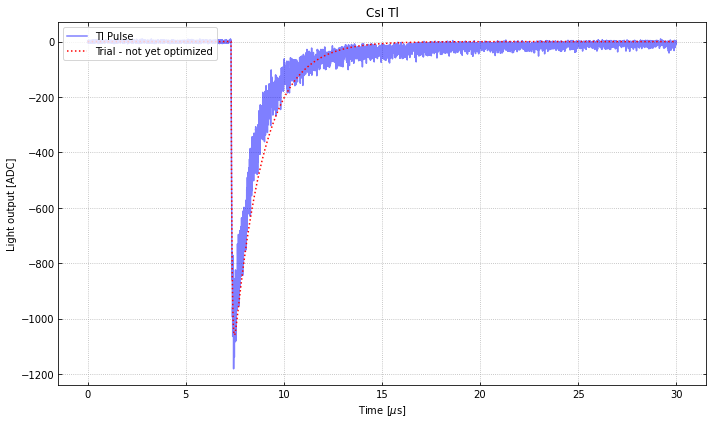

In [16]:
amp_withdelay, t0_withdelay, chi2_withdelay = OF.ofamp_withdelay()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange( len(signal))*2e-3, signal, label="Tl Pulse", color="blue", alpha=0.5)
ax.plot(np.arange( len(signal))*2e-3, amp_withdelay*np.roll(template, int(t0_withdelay*fs)), 
        label="Trial - not yet optimized", color="red", linestyle="dotted")
ax.set_ylabel("Light output [ADC]")
ax.set_xlabel("Time [$\mu$s]")
# ax.set_xlim(0,15000)
ax.set_title("CsI Tl")
lgd = ax.legend(loc="upper left")
ax.tick_params(which="both", direction="in", right=True, top=True)
ax.grid(linestyle="dotted")
fig.tight_layout()

In [12]:
tl_noise.calculate_psd()
tl_noise.plot_psd(lgcoverlay=True)

NameError: name 'tl_noise' is not defined

In [ ]:
nonlinof = qp.OFnonlin(psd_sim, fs, template=None)
params, error, _, chi2_nonlin, success = nonlinof.fit_falltimes(signal, npolefit=2, lgcfullrtn=True, lgcplot=True)
# params :  best fit parameters ; error : The corresponding fit errors for the best fit parameters ; 
# _ : The convariance matrix returned from the fit ; success : The success flag from scipy.optimize.curve_fit i.e True if the fit converged. 

In [ ]:
# Order of amplitudes, then rise/fall times, and then the time the pulse starts.

In [ ]:
print(np.argmin(signal, axis=None))
print(signal[np.argmin(signal, axis=None)], signal.min())
print (np.argmin(signal, axis=None)*0.002)
3660*0.002 -  (np.argmin(signal, axis=None)*0.002)

Plotting psd